In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl
#%matplotlib inline

from sklearn.neighbors import KernelDensity

#Source: https://www.kaggle.com/neilsummers/west-nile-heatmap-by-year/output

#import map and CSV data
mapdata = np.loadtxt("./input/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('./input/train.csv', parse_dates=['Date'])[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
spry = pd.read_csv('./input/spray.csv', parse_dates=['Date','Time'])[['Date', 'Time','Longitude', 'Latitude']]

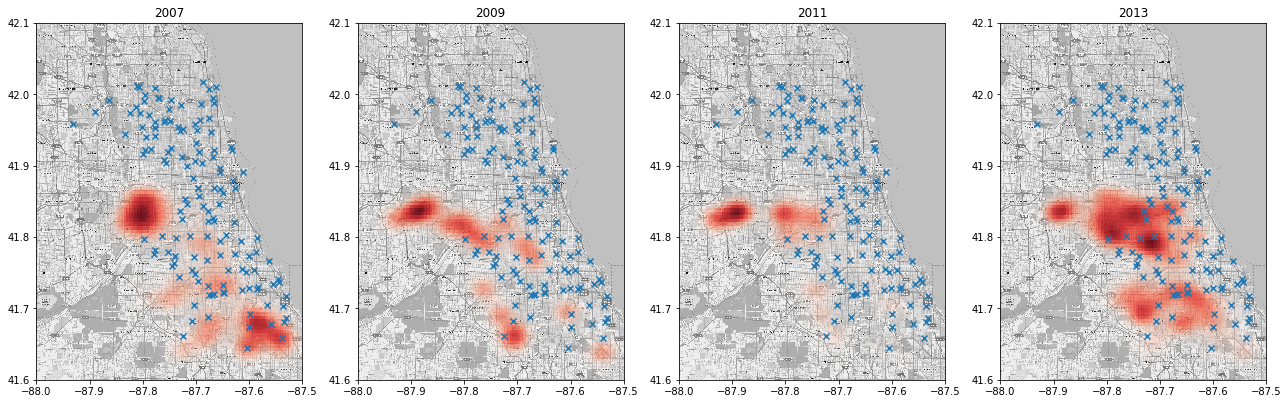

In [19]:
alpha_cm = pl.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

pl.figure(figsize=(18,6))
for year, subplot in zip([2007, 2009, 2011, 2013], [141, 142, 143, 144]):
    sightings = traps[(traps['WnvPresent'] > 0) & (traps['Date'].apply(lambda x: x.year) == year)]
    sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.4, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    pl.subplot(subplot)
    pl.gca().set_title(year)
    pl.imshow(mapdata, 
               cmap=pl.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.tight_layout()
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
    #spray_locations = spry[['Longitude', 'Latitude']].drop_duplicates().values
    pl.scatter(locations[:,0], locations[:,1], marker='x')
   # pl.scatter(spray_locations[:,0], spray_locations[:,1], marker='x')

pl.savefig('heatmap.png')

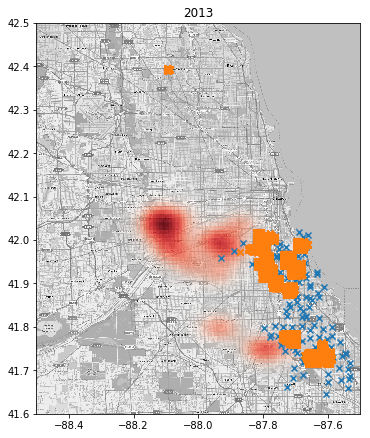

In [30]:
lon_lat_box = (-88.5, -87.5, 41.6, 42.5)
pl.figure(figsize=(20,10))
for year, subplot in zip([2013], [144]):
    sightings = spry[['Date','Longitude', 'Latitude']]
    #sightings = sightings.groupby(['Date','Longitude', 'Latitude'])
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.4, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    pl.subplot(subplot)
    pl.gca().set_title(year)
    pl.imshow(mapdata, 
               cmap=pl.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.tight_layout()
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
    spray_locations = spry[['Longitude', 'Latitude']].drop_duplicates().values
    pl.scatter(locations[:,0], locations[:,1], marker='x')
    pl.scatter(spray_locations[:,0], spray_locations[:,1], marker='x')

pl.savefig('heatmap.png')